In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.pyplot as plt
%matplotlib inline

# Отток клиентов телекома

Данные https://github.com/Yorko/mlcourse_open/blob/master/data/telecom_churn.csv

In [3]:
telecom = pd.read_csv('../6/telecom_churn.csv')
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Одинаково ли распределено количество минут днем?

График из предыдущего съезда

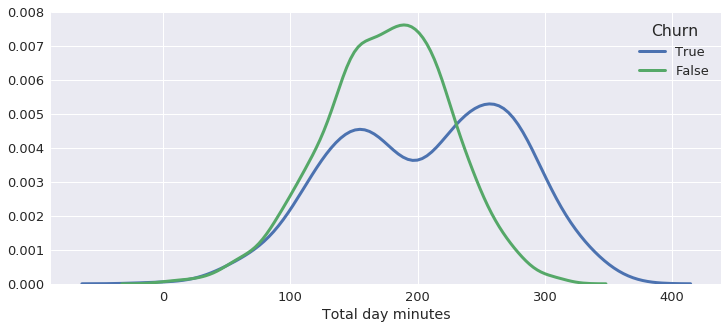

In [4]:
sns.set(font_scale=1.3)
plt.figure(figsize=(12, 5))
sns.kdeplot(telecom[telecom['Churn'] == True]['Total day minutes'], 
            label='True', lw=3)
sns.kdeplot(telecom[telecom['Churn'] == False]['Total day minutes'], 
            label='False', lw=3)
plt.xlabel('Total day minutes')
plt.legend(title='Churn');

Очевидно, что распределения разные.
Критерий Уилкоксона-Манна-Уитни отвергает гипотезу однородности.

In [5]:
x = telecom[telecom['Churn'] == False]['Total day minutes']
y = telecom[telecom['Churn'] == True]['Total day minutes']

sps.mannwhitneyu(x, y, alternative='two-sided')

MannwhitneyuResult(statistic=495604.0, pvalue=6.715053420859948e-23)

Оценка сдвига

In [6]:
W = (y[:, np.newaxis] - x[np.newaxis, :]).ravel()
shift = np.median(W)
shift

33.80000000000001

Всякие параметры для вычисления доверительного интервала

In [7]:
alpha = 0.05
n, m = len(x), len(y)
z = sps.norm.ppf(1 - alpha)
k = int(np.floor(n*m/2 - 0.5 - z * np.sqrt(n*m*(n+m+1)/12)))
k

656107

Доверительный интервал величины сдвига. По сравнению с формулами тут из индексов надо вычесть 1, поскольку используется нумерация с нуля.

In [8]:
W.sort()
W[k], W[n*m-k-1]

(28.30000000000001, 39.30000000000001)

Вообще говоря, сдвиг в данном случае рассматривать не совсем корректно, поскольку распределения сильно отличаются еще и формой, как видно из графика.

### Одинаково ли распределено количество минут ночью?

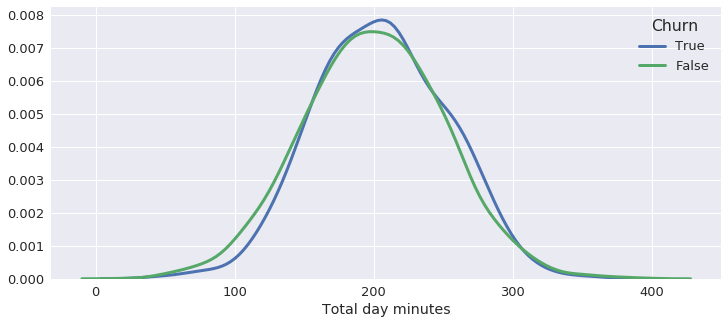

In [9]:
sns.set(font_scale=1.3)
plt.figure(figsize=(12, 5))
sns.kdeplot(telecom[telecom['Churn'] == True]['Total night minutes'], 
            label='True', lw=3)
sns.kdeplot(telecom[telecom['Churn'] == False]['Total night minutes'], 
            label='False', lw=3)
plt.xlabel('Total day minutes')
plt.legend(title='Churn');

Критерий Уилкоксона-Манна-Уитни отвергает гипотезу, но при это pvalue сильно близко к пограничному.

In [10]:
x = telecom[telecom['Churn'] == False]['Total night minutes']
y = telecom[telecom['Churn'] == True]['Total night minutes']

sps.mannwhitneyu(x, y, alternative='two-sided')

MannwhitneyuResult(statistic=649507.0, pvalue=0.04744034531465512)

Оценка сдвига. Как видим, разница составляет всего 5 минут, в то время как значения выборки 100-300 минут.
Т.е. имеется статистическая значимость, в то время как практической значимости полученный результат не имеет.

In [11]:
W = (y[:, np.newaxis] - x[np.newaxis, :]).ravel()
shift = np.median(W)
shift

4.900000000000006

Доверительный интервал сдвига очень близок к нулю.

In [12]:
W.sort()
W[k], W[n*m-k-1]

(0.8000000000000114, 9.0)

Распределения по графику похожи на нормальные, критерий Шапиро-Уилка нормальность не отвергает.

In [13]:
sps.shapiro(x), sps.shapiro(y)

((0.9994863867759705, 0.673305869102478),
 (0.997378408908844, 0.6467164158821106))

Критерий Стьюдента отвергает однородность с чуть меньшим pvalue. Но, вообще говоря, тут еще МПГ нужна.

In [14]:
sps.ttest_ind(x, y)

Ttest_indResult(statistic=-2.049754997609212, pvalue=0.040466484637911374)

---------

Прикладная статистика и анализ данных, 2019

Никита Волков

https://mipt-stats.gitlab.io/